In [143]:
import operator
import random
import numpy as np
from deap import algorithms, base, creator, gp, tools

def protectedDiv(left, right):
    return left / right if right else 1

def revers(x):
    return 1 / x if x else 1

def sqrt(x):
    return np.sqrt(np.abs(x))

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

pset = gp.PrimitiveSet("MAIN", arity=1)
pset.addPrimitive(operator.add, arity=2)
pset.addPrimitive(operator.sub, arity=2)
pset.addPrimitive(operator.mul, arity=2)
pset.addPrimitive(protectedDiv, arity=2)
pset.addPrimitive(revers, arity=1)
pset.addPrimitive(sqrt, arity=1)
pset.addPrimitive(np.sin, arity=1)
pset.addPrimitive(np.cos, arity=1)
pset.addPrimitive(np.tan, arity=1)
# pset.addPrimitive(np.log, arity=1)
pset.addPrimitive(np.abs, arity=1)
pset.addEphemeralConstant("rand", lambda: random.uniform(-1, 1))
pset.renameArguments(ARG0='x')

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evaluate(individual, points):
    func = toolbox.compile(expr=individual)
    sqerrors = ((func(x) - y)**2 for x, y in points)
    return np.sum(sqerrors),


# import pandas as pd
# X, Y = [], []
# with open("output.txt", "r") as f:
#     for i in f.readlines():
#         x, y = i.split(',')
#         if x == 'end':
#             break
#         X.append(int(x))
#         Y.append(int(y))
# X = pd.DataFrame(X)
# Y = pd.DataFrame(Y)
# Y = max(Y) - Y
# x_points = X.values
# y_points = Y.values

# x_points = np.linspace(-1, 1, 50)
# y_points = np.concatenate([np.sin(x_points[:25]), x_points[25:]**2])

x_points = np.linspace(-10, 10, 1000)
y_points = x_points*np.sin(5*x_points)


population = toolbox.population(n=300)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutNodeReplacement, pset=pset)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate, points=list(zip(x_points, y_points)))

algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50)

best_individual = tools.selBest(population, k=1)[0]
best_func = toolbox.compile(expr=best_individual)
print("Best individual:", best_individual)
print("Best function:", best_func)


C:\Users\tigra\AppData\Local\Temp\ipykernel_19644\1136438135.py:42: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(sqerrors),


gen	nevals
0  	300   
1  	202   
2  	190   
3  	174   
4  	183   
5  	179   
6  	184   
7  	180   
8  	173   
9  	197   
10 	165   
11 	183   
12 	180   
13 	177   
14 	172   
15 	177   
16 	175   
17 	187   
18 	194   
19 	184   
20 	190   
21 	175   
22 	144   
23 	192   
24 	180   
25 	180   
26 	179   
27 	169   
28 	181   
29 	164   
30 	183   
31 	182   
32 	189   
33 	169   
34 	171   
35 	185   
36 	183   
37 	174   
38 	178   
39 	161   
40 	161   
41 	184   
42 	205   
43 	182   
44 	191   
45 	185   
46 	164   
47 	181   
48 	185   
49 	174   
50 	191   
Best individual: mul(-0.046618865446536484, absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(absolute(x)))))))))))))))))
Best function: <function <lambda> at 0x0000011FE6E86B60>


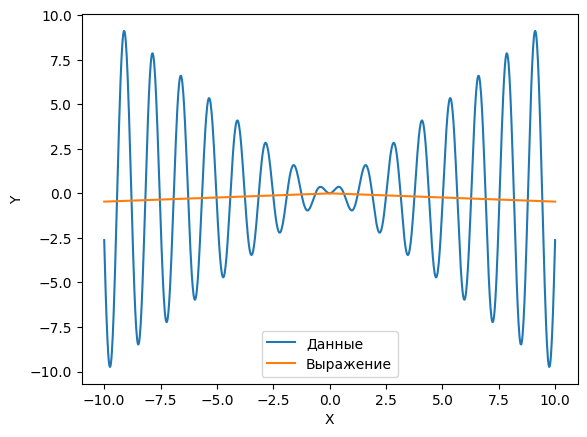

In [144]:
import matplotlib.pyplot as plt

predicted_values = [best_func(x) for x in x_points]

plt.plot(x_points, y_points, label='Данные')
plt.plot(x_points, predicted_values, label='Выражение')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [140]:
import sympy as sp
def simplify_formula(ind):
    locals = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x : -x,
    }

    # ind = 'div(add(div(x, mul(y, y)), 1), mul(x, y))'
    # print(f'original: {ind}')
    expr = sp.sympify(str(ind) , locals=locals)
    return expr

print(simplify_formula(best_individual))

cos(protectedDiv(cos(protectedDiv(x, 0.3233209543714832)), -0.33259622893160423))*tan(cos(x))
